In [4]:
import numpy as np

# **Step 1: Implementing Gates, Activation Function and Loss Functions:**

## 1- Gates:

In [5]:
class Gate:
    def forward(self):
        raise NotImplementedError
    
    def backward(self):
        raise NotImplementedError
    
class AddGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
    
    def backward(self, dz):
        dx = dz * np.ones_like(self.x)
        dy = dz * np.ones_like(self.y) 
        return dx, dy
    
class MultiplyGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dz):
        dx = dz * self.y
        dy = dz * self.x
        
        return dx, dy
    
    

## 2- Activation Functions:

In [6]:
class linear(Gate):
    def forward(self, x):
        self.x = x
        return x
    
    def backward(self, dz):
        return dz

class relu(Gate):
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, dz):
        return dz if self.x > 0 else 0

class sigmoid(Gate):
    def forward(self, x):
        self.x = x
        return 1 / (1 + np.exp(-np.array(x)))
    
    def backward(self, dz):
        return dz * self.forward(self.x)(1 - self.forward(self.x))
    

class softmax(Gate):
    def forward(self, x):
        self.x = x
        return np.exp(x) / np.sum(np.exp(x), axis = -1, keepdims = True)
    
    def backward(self, dz):
        return dz * self.forward(self.x) * (1 - self.forward(self.x))

class tanh(Gate):
    def forward(self, x):
        self.x = x
        return np.tanh(x)
    
    def backward(self, dz):
        return dz * (1 - np.tanh(self.x) * 2)

## 3- Loss Functions:

In [7]:
class binary_cross_entropy(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return - np.mean( y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def backward(self, dz):
        return dz * (self.y_hat - self.y) / (self.y_hat * (1 - self.y_hat))
    
    
class l2_loss(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return 0.5 * np.mean(np.power(y - y_hat, 2))
    
    def backward(self, dz):
        return dz * (self.y_hat - self.y)

### Test cases:

In [8]:
x = 3
y = 4

print(f"x = {x}, y = {y}")

add_gate = AddGate()
output = add_gate.forward(x,y)
print("Add Gate = ", output)

multiply_gate = MultiplyGate()
output = multiply_gate.forward(x,y)
print("Multiply Gate = ", output)

relu_function = relu()
output = relu_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Relu of [-1, 2, 5, 0, -10, 6] = ", output)

sigmoid_function = sigmoid()
output = sigmoid_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Sigmoid of [-1, 2, 5, 0, -10, 6] = ", output)

softmax_function = softmax()
output = softmax_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Softmax of [-1, 2, 5, 0, -10, 6] = ", output)

tanh_function = tanh()
output = tanh_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Tanh of [-1, 2, 5, 0, -10, 6] = ", output)

bce_loss = binary_cross_entropy()
result = bce_loss.forward(1, 0.8)
print("--> BCE loss = ", result)

mse_loss = l2_loss()
result = mse_loss.forward(1, 0.8)
print("--> L2 loss = ", result)

x = 3, y = 4
Add Gate =  7
Multiply Gate =  12
-> Relu of [-1, 2, 5, 0, -10, 6] =  [0 2 5 0 0 6]
-> Sigmoid of [-1, 2, 5, 0, -10, 6] =  [2.68941421e-01 8.80797078e-01 9.93307149e-01 5.00000000e-01
 4.53978687e-05 9.97527377e-01]
-> Softmax of [-1, 2, 5, 0, -10, 6] =  [6.56225724e-04 1.31806460e-02 2.64740352e-01 1.78380646e-03
 8.09846881e-08 7.19638889e-01]
-> Tanh of [-1, 2, 5, 0, -10, 6] =  [-0.76159416  0.96402758  0.9999092   0.         -1.          0.99998771]
--> BCE loss =  0.2231435513142097
--> L2 loss =  0.01999999999999999


<a name="toc_40291_2.1"></a>
## Gradient descent summary
developing a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

**Compute_Cost**

In [9]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


*gradient descent* as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$



In [10]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

***Batch Gradient Descent***

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [12]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


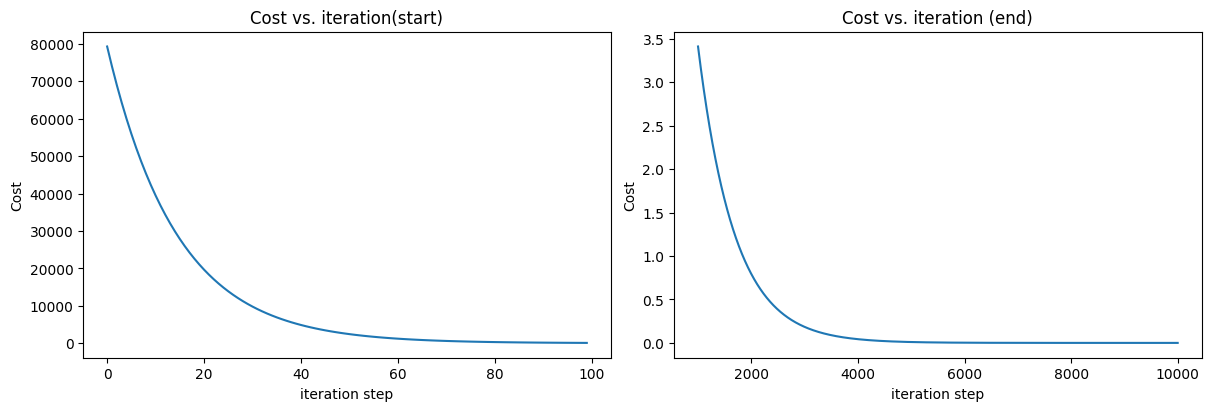

In [13]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

**Vectorized Implementation**

In [20]:
def batch_gradient_descent(x,y,epochs,alpha=0.01):
    number_of_features = x.shape[0] 
    total_samples= x.shape[0]
    
    w=np.ones(shape=(number_of_features))
    b =0 
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_predicted = np .dot(w,x.T)+b
        
        w_grad = -(2/total_samples)*(x.T.dot(y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y-y_predicted)
        
        w= w-alpha*w_grad
        b= b-alpha*b_grad
        MSE_cost= np.mean(np.square(y-y_predicted))
        if i%10 ==0 :
            cost_list.append(MSE_cost)
            epoch_list.append(i)
    return w,b,MSE_cost,cost_list,epoch_list
       
        

In [21]:
w,b,MSE_cost,cost_list_batch,epoch_list_batch=batch_gradient_descent(x,y,500)
w,b,MSE_cost

AttributeError: 'int' object has no attribute 'shape'

NameError: name 'epoch_list' is not defined

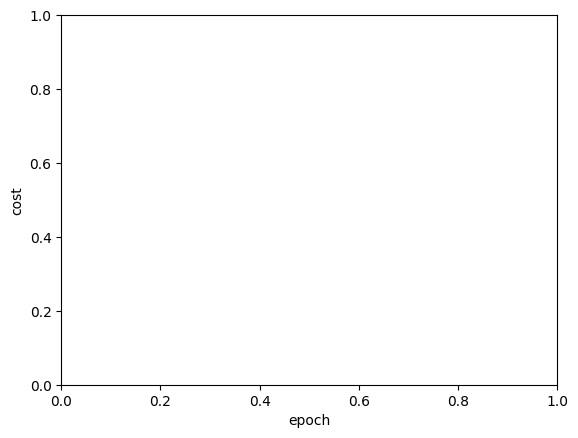

In [22]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_batch,cost_list_batch)

In [25]:
def stochastic_gradient_descent(x,y,epochs,alpha=0.01):
    number_of_features = x.shape[0] 
    total_samples= x.shape[0]
    
    w=np.ones(shape=(number_of_features))
    b =0 
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        #use random sample
        random_index = random.randint(0,total_samples-1)
        x = x[random_index]
        y = y[random_index]
        y_predicted=np.dot(w,x.T) + b 
        
        w_grad = -(2/total_samples)*(x.T.dot(y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y-y_predicted)
        
        w= w-alpha*w_grad
        b= b-alpha*b_grad
        MSE_cost= np.mean(np.square(y-y_predicted))
        if i%10 ==0 :
            cost_list.append(MSE_cost)
            epoch_list.append(i)
    return w,b,MSE_cost,cost_list,epoch_list
       

In [24]:
w,b,MSE_cost,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(x,y,500)
w,b,MSE_cost

NameError: name 'stochastic_gradient_descent' is not defined

NameError: name 'epoch_list_sgd' is not defined

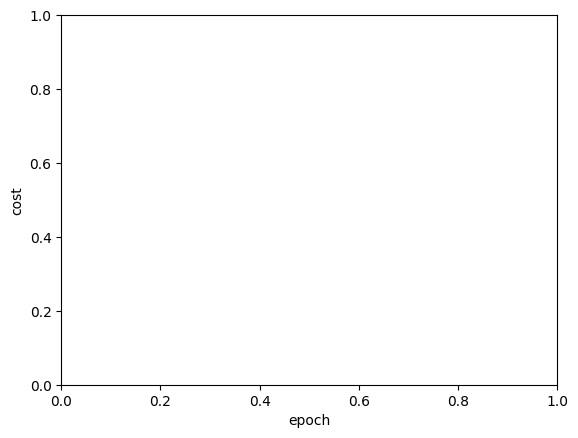

In [26]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
def mini_batch_gradient_descent(X, y, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [ ]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    x,
    y,
    epochs = 120,
    batch_size = 5
)
w, b, cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)